In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
kyphosis_df = pd.read_csv('../datasets/kyphosis.csv')
display(kyphosis_df.head())
kyphosis_df.info()


Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


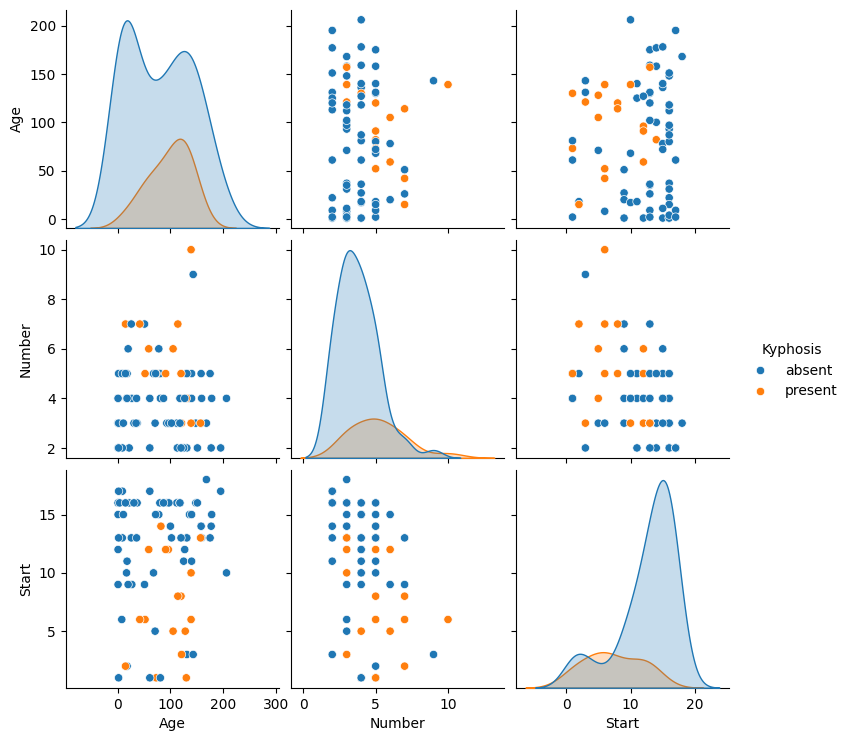

In [9]:
sns.pairplot(kyphosis_df, hue = 'Kyphosis')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X = kyphosis_df.drop('Kyphosis', axis = 1)
y = kyphosis_df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [11]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Classification Report for Decision Tree Model using Kyphosis Data:")
print(classification_report(y_test,decision_tree_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, decision_tree_y_pred))

Classification Report for Decision Tree Model using Kyphosis Data:
              precision    recall  f1-score   support

      absent       0.76      0.89      0.82        18
     present       0.50      0.29      0.36         7

    accuracy                           0.72        25
   macro avg       0.63      0.59      0.59        25
weighted avg       0.69      0.72      0.69        25

Confusion Matrix:
[[16  2]
 [ 5  2]]


In [13]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(X_test)
print("Classification Report for Random Forest Model using Kyphosis Data:")
print(classification_report(y_test, random_forest_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, random_forest_y_pred))

Classification Report for Random Forest Model using Kyphosis Data:
              precision    recall  f1-score   support

      absent       0.75      1.00      0.86        18
     present       1.00      0.14      0.25         7

    accuracy                           0.76        25
   macro avg       0.88      0.57      0.55        25
weighted avg       0.82      0.76      0.69        25

Confusion Matrix:
[[18  0]
 [ 6  1]]
